<a href="https://colab.research.google.com/github/89CANDY89/BOOTCAMP-2-ALURA/blob/main/MODULO%202/PROJETO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJETO 2: Relacionar quantidade de vacinas e gasto em saúde.

#Importar Bibliotecas

In [9]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sb

#Carregar informações

In [11]:
dados1 = pd.read_csv("https://raw.githubusercontent.com/89CANDY89/BOOTCAMP-2-ALURA/main/dados/DOSES%20POR%20ESTADO.csv", encoding="ISO-8859-1",
                    skiprows = 0, sep=";", skipfooter = 1, thousands = ".", decimal = "," , engine = "python")

dados2 = pd.read_csv("https://raw.githubusercontent.com/89CANDY89/BOOTCAMP-2-ALURA/main/dados/A120703189_28_143_208.csv", encoding='ISO-8859-1', skiprows=3, sep = ';', skipfooter=12, thousands='.', decimal=',', engine='python')

In [12]:
# Modificando o modo de leitura dos valores totais dos gastos.
pd.options.display.float_format = "{:.2f}".format

#Tratar Dados

Comparar numero de doses ao longo dos anos com os gastos do SUS 

In [13]:
colunas_usaveis_def3 = dados1.mean().index.tolist()
colunas_usaveis_def3.insert(0,"Unidade da Federação")

In [14]:
usaveis_def3 = dados1[colunas_usaveis_def3]
usaveis_def3 = usaveis_def3.set_index("Unidade da Federação")

usaveis_def3.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Dez,2021/TOTALE
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,178932,95359,73193,163535,86012,235824,93365,785330,90069,68268,60769,63348,71386,61200,78320,175826,102095,235537,78821,83649,231824,73700,71377,60858,62624,58800,79042,169658,91309,225175,78529,227038,69962,70735,77844,74815,78515,81401,83531,88499,...,87536,77652,138877,134188,79137,77014,68930,58752,82237,71341,71163,86015,88568,74321,80200,83566,91380,104087,79399,53573,80264,89835,78114,56546,74602,78199,79135,80150,72766,103357,85260,52404,51759,51206,61364,63157,66912,13598,0,16142380
12 Acre,75967,47823,42638,83750,55741,162863,46589,392150,74149,41209,42827,35839,39852,43449,46723,98756,61884,161981,51180,50755,161613,45577,45782,42972,35054,38491,49855,91068,54318,146752,38928,143586,37490,36786,42920,45089,52875,54573,63567,60827,...,39340,33138,39502,72646,34714,37836,32721,26697,40682,37351,36522,41670,40283,37626,41300,38967,37878,45440,41413,30822,44542,39371,34534,21410,29684,25823,33836,29468,32871,44162,32184,24494,28182,21841,26625,28942,21795,1253,0,8309265
13 Amazonas,362598,223540,195949,382469,241685,613409,209090,1709946,223520,180388,174280,164874,166252,176474,192866,395718,270893,603714,222510,236356,586026,188910,194757,168389,166464,161654,213715,377209,228355,558016,169788,573615,187582,171534,188006,173725,196916,205619,200936,224945,...,284171,234577,581957,556559,279503,257870,205095,171852,256039,229700,288559,283221,247671,208097,227808,244090,230625,252749,208671,158480,263917,228216,217479,63587,165542,223678,205119,223963,197850,273945,191785,156783,124813,148059,190915,188482,189358,26876,0,41904247
14 Roraima,60897,54141,38518,47611,41415,98733,37541,100206,152362,25861,22799,22486,26308,30326,30197,52883,45781,89725,33493,34455,84498,31529,27477,23331,28580,24336,27300,51808,34476,78697,28642,79031,33134,29123,26266,25654,28289,31316,30902,34412,...,72922,52105,61893,59952,39823,65675,63046,56998,72926,55377,53817,52092,61621,33496,39703,47430,48341,70431,51731,45694,58562,50014,42947,22287,24747,27616,54192,30122,31332,39993,28229,26090,32711,29344,35267,36317,14482,3993,0,6958218
15 Pará,539062,410146,348803,772385,385744,1449405,354966,1314394,2793457,295497,365440,291755,338173,354901,366351,854416,389357,1251442,368883,362098,1358423,398248,357114,309434,283981,298224,345633,752225,328776,1128337,340574,1183000,332758,293336,314787,295445,298736,338980,352575,406099,...,279049,259024,335140,476956,303202,308859,285931,216711,356131,327355,324522,336084,334859,299320,330618,360301,380274,500042,367945,248664,398677,417918,392098,191441,214887,306008,409831,406232,390566,415484,313079,199509,252327,229159,266990,250709,201067,29036,0,68090618


In [15]:
dados2.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [17]:
colunas_usaveis = dados2.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados2[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
# usaveis = usaveis.drop("Total", axis=1)
# usaveis["Total"] = usaveis.sum(axis=1)
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 10**6

In [ ]:
# Separando o Id e renomeando o index só com os estados
id_uf = usaveis_def3.index.str.slice(stop=2)
usaveis_def3.index = usaveis_def3.index.str.slice(start=3)

In [ ]:
usaveis_def3.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [ ]:
usaveis_def3= usaveis_def3.drop("2021/TOTALE", axis=1)
usaveis_ordenado = usaveis_def3.sort_values(by="Unidade da Federação", ascending=False)
usaveis_ordenado.index = usaveis_ordenado.index.str[3:]
usaveis_ordenado = usaveis_ordenado[usaveis_ordenado.columns[6:]]
usaveis_ordenado = usaveis_ordenado
usaveis_ordenado.head()

,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Distrito Federal,113787,1200574,130875,107954,97071,92967,115291,94120,124558,298881,142516,324659,119879,109240,316655,102438,100355,101643,108194,92680,129028,290773,135655,332252,122086,328128,128229,113382,112268,130133,134085,118957,115800,121743,161966,128591,133692,155643,132309,119304,...,119710,114728,113530,134116,199768,115590,120011,101797,91190,131040,105523,114111,116994,140270,105828,126629,186593,136782,141714,106345,93995,149629,149376,124729,87404,136282,120248,112715,152619,120341,162030,120903,86169,106107,83218,104881,105647,122256,25068,0
Goiás,293709,1594276,842252,340664,320188,420456,230234,217624,239180,733734,273416,762935,258878,237496,722056,220065,221790,192228,223051,205622,243781,710761,270431,742506,272260,761153,231719,235511,276681,254168,304291,276826,267753,279454,310837,332621,281547,389017,292975,278702,...,278204,247057,225768,275630,396437,236918,259244,239015,177173,282321,224380,271061,290296,285416,207976,257184,291158,282268,282258,240472,135510,273800,264663,229446,174114,307737,251861,270901,255436,246964,457753,268821,163308,193679,169783,204936,257003,162366,23412,0
Mato Grosso,178667,1917717,220199,140363,117132,112904,118145,127045,130596,327752,163528,410036,172975,133280,393470,143139,122790,117895,90730,109941,109971,332406,157787,415139,147365,406574,147602,122556,128609,128808,119432,133336,136401,153236,172595,170721,170931,177376,147713,145149,...,163320,165790,146257,171267,274738,148904,169187,147517,119937,171185,134883,147572,173925,182518,139892,165137,175876,165657,198231,168138,110847,185024,205771,148512,112303,169314,149123,168303,157033,147951,253102,170452,108903,139672,118314,132586,136317,131813,17996,0
Mato Grosso do Sul,106923,851361,432341,101989,96712,74086,113427,92079,112963,311878,168367,373798,114543,104958,332099,97214,102290,77925,100242,83234,120143,319574,147591,339706,110114,334063,101361,106499,118289,96288,137292,122861,126537,135232,157199,156938,142648,172728,130018,133412,...,128756,141505,127067,144557,240183,153269,139418,126306,92908,145287,120782,128522,146822,154124,122369,153013,153269,164181,164140,135364,103477,121780,130425,104080,82466,125843,127466,138667,124923,112975,169843,124720,78830,96925,82751,90663,104903,75551,13606,0
Rio Grande do Sul,294184,2455944,1274657,540508,343534,917295,940767,607787,479033,2391558,1538289,1350963,366274,302535,1016735,297041,300223,295500,271015,258689,308719,1371720,332200,1015727,305134,1009148,282288,310131,342119,351874,356969,363906,371554,382832,444672,638554,557882,492630,362806,352006,...,385514,356740,349803,440469,591486,330354,394171,358794,279979,398592,349745,365809,446235,422462,358681,436266,433914,377091,493289,422994,284444,430597,573647,387594,272662,382401,389326,439277,387649,336727,595661,423386,272344,297255,255041,294923,336132,206074,30593,0


In [ ]:
mensal = usaveis_ordenado.T
mensal = mensal / 10000
mensal.head()

Unidade da Federação,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Rio Grande do Sul,Santa Catarina,Paraná,São Paulo,Rio de Janeiro,Espírito Santo,Minas Gerais,Bahia,Sergipe,Alagoas,Pernambuco,Paraíba,Rio Grande do Norte,Ceará,Piauí,Maranhão,Tocantins,Amapá,Pará,Roraima,Amazonas,Acre,Rondônia
2008/Jul,11.38,29.37,17.87,10.69,29.42,21.80,31.89,175.25,43.69,12.45,59.78,50.92,7.38,9.04,30.44,12.83,9.22,28.92,11.07,31.43,5.95,3.40,35.50,3.75,20.91,4.66,9.34
2008/Ago,120.06,159.43,191.77,85.14,245.59,260.99,448.61,1794.94,546.44,158.66,807.88,666.09,95.40,125.26,399.45,105.51,180.76,391.62,123.78,412.84,67.82,31.08,131.44,10.02,170.99,39.22,78.53
2008/Set,13.09,84.23,22.02,43.23,127.47,18.39,38.47,157.00,230.58,12.63,131.27,71.82,7.20,27.21,31.16,17.77,8.70,42.41,17.05,57.10,7.69,3.80,279.35,15.24,22.35,7.41,9.01
2008/Out,10.80,34.07,14.04,10.20,54.05,17.07,32.34,132.75,118.98,11.19,67.29,52.32,6.72,10.77,28.47,18.86,8.57,22.90,10.72,30.45,6.16,3.06,29.55,2.59,18.04,4.12,6.83
2008/Nov,9.71,32.02,11.71,9.67,34.35,17.08,31.37,126.23,76.54,10.70,66.22,47.11,6.97,10.32,28.88,18.78,9.00,24.92,13.62,32.10,5.80,2.78,36.54,2.28,17.43,4.28,6.08


In [ ]:
from datetime import datetime
from datetime import date

In [ ]:
meses = {"Jan":1,
         "Fev":2,
         "Mar":3,
         "Abr":4,
         "Mai":5,
         "Jun":6,
         "Jul":7,
         "Ago":8,
         "Set":9,
         "Out":10,
         "Nov":11,
         "Dez":12}

def para_data(ano_mes):
  ano = int(ano_mes[0:4])
  mes = ano_mes[5:8]
  mes = int(meses[mes])
  return date(ano, mes, 1)

mensal.index = mensal.index.map(para_data)

In [ ]:
mensal.head()

Unidade da Federação,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Rio Grande do Sul,Santa Catarina,Paraná,São Paulo,Rio de Janeiro,Espírito Santo,Minas Gerais,Bahia,Sergipe,Alagoas,Pernambuco,Paraíba,Rio Grande do Norte,Ceará,Piauí,Maranhão,Tocantins,Amapá,Pará,Roraima,Amazonas,Acre,Rondônia
2008-07-01,11.38,29.37,17.87,10.69,29.42,21.80,31.89,175.25,43.69,12.45,59.78,50.92,7.38,9.04,30.44,12.83,9.22,28.92,11.07,31.43,5.95,3.40,35.50,3.75,20.91,4.66,9.34
2008-08-01,120.06,159.43,191.77,85.14,245.59,260.99,448.61,1794.94,546.44,158.66,807.88,666.09,95.40,125.26,399.45,105.51,180.76,391.62,123.78,412.84,67.82,31.08,131.44,10.02,170.99,39.22,78.53
2008-09-01,13.09,84.23,22.02,43.23,127.47,18.39,38.47,157.00,230.58,12.63,131.27,71.82,7.20,27.21,31.16,17.77,8.70,42.41,17.05,57.10,7.69,3.80,279.35,15.24,22.35,7.41,9.01
2008-10-01,10.80,34.07,14.04,10.20,54.05,17.07,32.34,132.75,118.98,11.19,67.29,52.32,6.72,10.77,28.47,18.86,8.57,22.90,10.72,30.45,6.16,3.06,29.55,2.59,18.04,4.12,6.83
2008-11-01,9.71,32.02,11.71,9.67,34.35,17.08,31.37,126.23,76.54,10.70,66.22,47.11,6.97,10.32,28.88,18.78,9.00,24.92,13.62,32.10,5.80,2.78,36.54,2.28,17.43,4.28,6.08


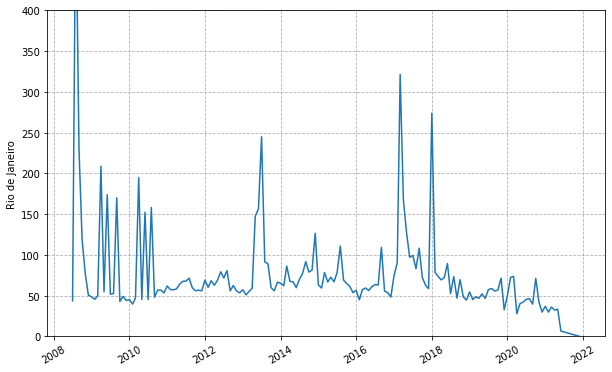

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = mensal, x=mensal.index, y="Rio de Janeiro")
plt.xticks(rotation=30)
#comentando a linha abaixo percebe que o plota o gráfico por ano
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))
plt.grid(True, linestyle='--')
plt.ylim(0,400)
# colocar como o método achar melhor a representação do eixo x
#ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.show()

POde-se obersar que a quantidade de doses teve uma amplitude baixa a apartir de 2018

COMPARANDO OS GASTOS COM A QUANTIDADE DE DOSES

In [18]:
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           177.41
31 Minas Gerais         79.78
41 Paraná               43.48
43 Rio Grande do Sul    37.80
33 Rio de Janeiro       49.15
Name: 2021/Mar, dtype: float64

In [19]:
gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]

Unidade da Federação
35 São Paulo             3.61
31 Minas Gerais          1.62
41 Paraná                0.88
43 Rio Grande do Sul     0.77
33 Rio de Janeiro        1.00
29 Bahia                 0.64
26 Pernambuco            0.80
42 Santa Catarina        0.39
23 Ceará                 0.35
52 Goiás                 0.51
15 Pará                  0.27
21 Maranhão              0.35
32 Espírito Santo        0.32
24 Rio Grande do Norte   0.18
25 Paraíba               0.25
53 Distrito Federal      0.30
50 Mato Grosso do Sul    0.08
22 Piauí                 0.19
27 Alagoas               0.17
51 Mato Grosso           0.18
13 Amazonas              0.14
28 Sergipe               0.06
17 Tocantins             0.02
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.05
16 Amapá                 0.02
Name: 2021/Mar, dtype: float64

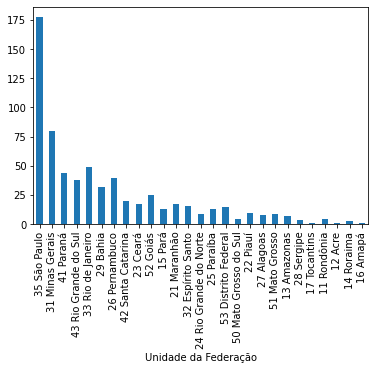

In [20]:
gastos_do_mais_recente.plot(kind='bar')

In [22]:
url_pop = 'https://github.com/89CANDY89/BOOTCAMP-2-ALURA/blob/main/dados/Tabela%206579.xlsx?raw=True'
pop = pd.read_excel(io=url_pop, header=3, skipfooter=1)

pop.rename(columns={'Unnamed: 0':'Ano'}, inplace=True)

In [23]:
pop.set_index('Ano',inplace=True)
pop.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,1493565,680075,3341094,412783,7321490,613166,1280513,6305537,3111881,8450528,3106436,3742604,8734196,3127560,1999374,14502563,19850060,3453646,15872362,41011638,10590171,6052587,10855228,2336060,2957735,5844995,2557159
2009,1503928,691132,3393369,421499,7431020,626609,1292051,6367138,3145325,8547809,3137541,3769977,8810256,3156108,2019679,14637364,20033665,3487199,16010429,41384039,10686247,6118743,10914128,2360498,3001692,5926300,2606885
2011,1576455,746386,3538387,460165,7688593,684309,1400892,6645761,3140328,8530155,3198657,3791315,8864906,3143384,2089819,14097534,19728701,3547055,16112678,41587182,10512349,6317054,10733030,2477542,3075936,6080716,2609998
2012,1590011,758786,3590985,469524,7777543,698602,1417694,6714314,3160748,8606005,3228198,3815171,8931028,3165472,2110867,14175341,19855332,3578067,16231365,41901219,10577755,6362734,10768025,2500365,3115336,6154996,2648532
2013,1728214,776463,3807921,488072,7969654,734996,1478164,6794301,3184166,8778576,3373959,3914421,9208550,3300935,2195662,15044137,20593356,3839366,16369179,43663669,10997465,6634254,11164043,2587269,3182113,6434048,2789761


In [24]:
temp = (pop.T /1000000).round(2)
temp[2010] = ((temp[2009] + temp[2011]) / 2).round(2)
pop = temp.T.sort_index()
pop.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,1.49,0.68,3.34,0.41,7.32,0.61,1.28,6.31,3.11,8.45,3.11,3.74,8.73,3.13,2.00,14.50,19.85,3.45,15.87,41.01,10.59,6.05,10.86,2.34,2.96,5.84,2.56
2009,1.50,0.69,3.39,0.42,7.43,0.63,1.29,6.37,3.15,8.55,3.14,3.77,8.81,3.16,2.02,14.64,20.03,3.49,16.01,41.38,10.69,6.12,10.91,2.36,3.00,5.93,2.61
2010,1.54,0.72,3.46,0.44,7.56,0.66,1.34,6.51,3.14,8.54,3.17,3.78,8.84,3.15,2.05,14.37,19.88,3.52,16.06,41.48,10.60,6.22,10.82,2.42,3.04,6.00,2.61
2011,1.58,0.75,3.54,0.46,7.69,0.68,1.40,6.65,3.14,8.53,3.20,3.79,8.86,3.14,2.09,14.10,19.73,3.55,16.11,41.59,10.51,6.32,10.73,2.48,3.08,6.08,2.61
2012,1.59,0.76,3.59,0.47,7.78,0.70,1.42,6.71,3.16,8.61,3.23,3.82,8.93,3.17,2.11,14.18,19.86,3.58,16.23,41.90,10.58,6.36,10.77,2.50,3.12,6.15,2.65


In [25]:
pop.index = [str(ano) + '/Jul' for ano in pop.index]
pop.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2008/Jul,1.49,0.68,3.34,0.41,7.32,0.61,1.28,6.31,3.11,8.45,3.11,3.74,8.73,3.13,2.00,14.50,19.85,3.45,15.87,41.01,10.59,6.05,10.86,2.34,2.96,5.84,2.56
2009/Jul,1.50,0.69,3.39,0.42,7.43,0.63,1.29,6.37,3.15,8.55,3.14,3.77,8.81,3.16,2.02,14.64,20.03,3.49,16.01,41.38,10.69,6.12,10.91,2.36,3.00,5.93,2.61
2010/Jul,1.54,0.72,3.46,0.44,7.56,0.66,1.34,6.51,3.14,8.54,3.17,3.78,8.84,3.15,2.05,14.37,19.88,3.52,16.06,41.48,10.60,6.22,10.82,2.42,3.04,6.00,2.61
2011/Jul,1.58,0.75,3.54,0.46,7.69,0.68,1.40,6.65,3.14,8.53,3.20,3.79,8.86,3.14,2.09,14.10,19.73,3.55,16.11,41.59,10.51,6.32,10.73,2.48,3.08,6.08,2.61
2012/Jul,1.59,0.76,3.59,0.47,7.78,0.70,1.42,6.71,3.16,8.61,3.23,3.82,8.93,3.17,2.11,14.18,19.86,3.58,16.23,41.90,10.58,6.36,10.77,2.50,3.12,6.15,2.65


In [26]:
ordenado_por_total.index = ordenado_por_total.index.str[3:]
gasto_sus = ordenado_por_total.T
gasto_sus.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [27]:
gasto_sus = gasto_sus.iloc[5:-3,:]
gasto_sus.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Jul,179.57,82.21,59.80,56.39,44.36,57.66,30.99,30.05,30.30,20.02,22.54,14.54,12.21,11.12,13.09,11.30,10.17,10.62,9.39,9.79,8.76,4.93,5.06,2.97,2.03,1.00,1.37
2008/Ago,180.01,80.37,56.70,56.23,42.50,43.25,31.71,28.89,29.30,21.05,23.26,14.61,12.38,10.81,12.67,11.55,9.60,10.65,9.26,8.99,8.33,4.54,5.21,2.94,1.89,1.05,1.55
2008/Set,180.15,82.41,58.09,57.91,43.07,42.85,30.70,30.73,30.44,21.41,23.67,15.32,12.49,11.26,12.79,12.42,10.27,11.04,9.23,8.84,8.15,4.53,5.20,2.84,2.08,1.00,1.55
2008/Out,191.86,88.61,61.37,59.59,44.55,43.33,31.17,31.27,31.74,20.61,23.35,15.62,12.85,10.57,12.73,12.42,10.81,11.14,9.46,9.24,7.68,4.57,6.01,2.88,2.23,1.06,1.64
2008/Nov,190.93,84.49,59.67,57.57,41.35,40.95,30.89,30.00,30.42,19.94,23.54,15.64,12.89,10.16,12.46,12.30,10.37,10.58,9.58,9.46,7.76,4.72,5.21,2.78,2.12,1.22,1.65


In [28]:
gasto_sus = gasto_sus.loc[pop.index.to_list()]
gasto_sus.index

Index(['2008/Jul', '2009/Jul', '2010/Jul', '2011/Jul', '2012/Jul', '2013/Jul',
       '2014/Jul', '2015/Jul', '2016/Jul', '2017/Jul', '2018/Jul', '2019/Jul',
       '2020/Jul'],
      dtype='object')

In [30]:
gasto_sus_pop = gasto_sus/pop
gasto_sus_pop = gasto_sus_pop[gasto_sus.columns] # Ordenando pelo custo absoluto
gasto_sus_pop.head() 

,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Jul,4.38,4.14,5.65,5.19,2.80,3.98,3.55,4.97,3.59,3.43,3.08,2.30,3.54,3.58,3.50,4.41,4.35,3.41,3.00,3.31,2.62,2.46,3.95,2.00,2.98,2.45,2.24
2009/Jul,5.17,5.00,6.64,6.34,3.34,3.49,4.01,6.26,4.03,3.93,3.54,2.83,4.35,4.20,4.33,5.54,5.07,4.09,3.59,3.89,2.79,3.03,4.91,2.48,2.97,3.26,2.80
2010/Jul,5.40,5.20,6.89,6.48,3.35,3.56,4.06,6.20,4.02,4.11,3.46,3.11,4.53,4.25,4.38,5.38,4.88,3.75,3.71,4.01,2.64,3.25,5.13,3.01,3.17,4.27,2.77
2011/Jul,5.78,5.58,7.33,6.60,3.39,3.91,4.90,6.61,4.12,4.42,3.34,3.01,4.92,4.66,3.87,5.42,5.32,3.80,3.94,3.87,2.82,3.23,4.78,2.73,3.75,3.58,2.58
2012/Jul,5.83,6.14,7.89,7.14,3.48,4.19,5.24,7.08,4.17,4.35,3.07,3.31,5.55,5.03,4.20,5.68,5.76,4.19,4.05,4.30,3.07,3.16,5.15,2.62,3.88,3.71,2.87


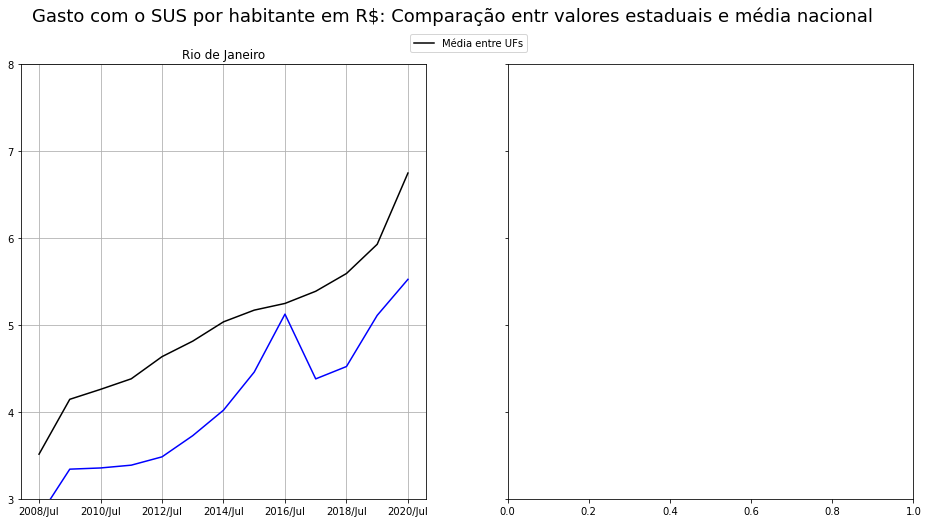

In [40]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(16,8))

gasto_sus_pop.mean(axis=1).plot(grid=True, ax=axs[0], color='k')
gasto_sus_pop['Rio de Janeiro'].plot(grid=True, ax=axs[0], color='b')

axs[0].set_title('Rio de Janeiro')

black_line = mlines.Line2D([], [], color='k', label='Média entre UFs')
plt.legend(handles=[black_line], bbox_to_anchor=(0.06,1.08))

plt.ylim(3,8)
plt.suptitle('Gasto com o SUS por habitante em R$: Comparação entr valores estaduais e média nacional', fontsize=18)

plt.show()

Pode-se obervar que apesar do elevado gasto no estado do Rio de Janeiro a partir de 2018 a quantidade de doses de vacinas não foi proporcional a esse aumento